#Import Packages

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

#Download and Load Dataset

In [ ]:
#Download dataset
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

#Read dataset
data = open('/tmp/sonnets.txt').read()

#Pre-processing

In [ ]:
#Create Corpus
corpus = data.lower().split("\n")

#Tokenization
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

#Model Design

In [ ]:
#Construct a sequential model using LSTM cells
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

#Model Training

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 15s 11ms/step - loss: 7.3104 - accuracy: 0.0209
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.5052 - accuracy: 0.0213
Epoch 3/100
484/484 [==============================] - 6s 11ms/step - loss: 6.4061 - accuracy: 0.0221
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2736 - accuracy: 0.0279
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1797 - accuracy: 0.0338
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0875 - accuracy: 0.0397
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0045 - accuracy: 0.0404
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9342 - accuracy: 0.0399
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8216 - accuracy: 0.0475
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 5.72

#Model Evaluation

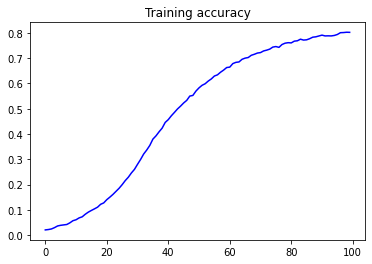

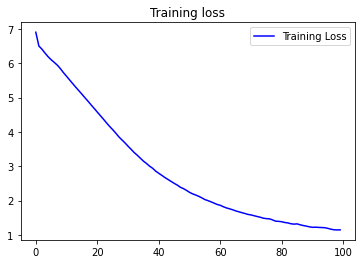

In [ ]:
import matplotlib.pyplot as plt

#Get loss and accuracy
acc = history.history['accuracy']
loss = history.history['loss']
#Number of training epochs
epochs = range(len(acc))
#Plot loss and accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

#Text Generation

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

#Loop over model prediction for each word
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

#Output

##Given text: Help me Obi Wan Kenobi, you're my only hope
### Generated text: Help me Obi Wan Kenobi, you're my only hope thy rose might know my pain mine eye well not thought it were it were to you had mine eye eyes wide time on thee words o'er forth truth pride rare bearing shame loving woe